In [3]:
install.packages(c("ggplot2", "dplyr", "HSAUR", "ggcorrplot"))
# Load essential libraries
library(ggplot2)
library(dplyr)
library(HSAUR) # Lots of inbuilt to play around
library(ggcorrplot)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
data(heptathlon)
str(heptathlon)

'data.frame':	25 obs. of  8 variables:
 $ hurdles : num  12.7 12.8 13.2 13.6 13.5 ...
 $ highjump: num  1.86 1.8 1.83 1.8 1.74 1.83 1.8 1.8 1.83 1.77 ...
 $ shot    : num  15.8 16.2 14.2 15.2 14.8 ...
 $ run200m : num  22.6 23.6 23.1 23.9 23.9 ...
 $ longjump: num  7.27 6.71 6.68 6.25 6.32 6.33 6.37 6.47 6.11 6.28 ...
 $ javelin : num  45.7 42.6 44.5 42.8 47.5 ...
 $ run800m : num  129 126 124 132 128 ...
 $ score   : int  7291 6897 6858 6540 6540 6411 6351 6297 6252 6252 ...


# Data Wrangling

In [6]:
heptathlon %>% mutate(sprint = ifelse(run200m <= 25 & run800m <= 129, 'fast', 'slow'))

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score,sprint
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291,fast
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897,fast
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858,fast
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540,slow
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540,fast
Schulz (GDR),13.75,1.83,13.50,24.65,6.33,42.82,125.79,6411,fast
Fleming (AUS),13.38,1.80,12.88,23.59,6.37,40.28,132.54,6351,slow
Greiner (USA),13.55,1.80,14.13,24.48,6.47,38.00,133.65,6297,slow
Lajbnerova (CZE),13.63,1.83,14.28,24.86,6.11,42.20,136.05,6252,slow


In [7]:
# p(run200m <= 24) appox. equal to 25%
quantile(heptathlon$run200m, 0.25)

25% 
23.92

In [8]:
quantile(heptathlon$run800m, 0.25)

25% 
132.24

In [9]:
mean(heptathlon$run800m)

[1] 136.054

In [10]:
heptathlon %>% mutate(sprint = ifelse(run200m <= 25 & run800m <= 134, 'fast', 'slow'))

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score,sprint
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291,fast
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897,fast
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858,fast
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540,fast
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540,fast
Schulz (GDR),13.75,1.83,13.50,24.65,6.33,42.82,125.79,6411,fast
Fleming (AUS),13.38,1.80,12.88,23.59,6.37,40.28,132.54,6351,fast
Greiner (USA),13.55,1.80,14.13,24.48,6.47,38.00,133.65,6297,fast
Lajbnerova (CZE),13.63,1.83,14.28,24.86,6.11,42.20,136.05,6252,slow


In [12]:
heptathlon  = heptathlon %>% mutate(sprint = ifelse(run200m <= 25 & run800m <= 134, 'fast', 'slow'))
head(heptathlon)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score,sprint
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291,fast
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897,fast
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858,fast
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540,fast
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540,fast
Schulz (GDR),13.75,1.83,13.50,24.65,6.33,42.82,125.79,6411,fast


In [13]:
str(heptathlon)

'data.frame':	25 obs. of  9 variables:
 $ hurdles : num  12.7 12.8 13.2 13.6 13.5 ...
 $ highjump: num  1.86 1.8 1.83 1.8 1.74 1.83 1.8 1.8 1.83 1.77 ...
 $ shot    : num  15.8 16.2 14.2 15.2 14.8 ...
 $ run200m : num  22.6 23.6 23.1 23.9 23.9 ...
 $ longjump: num  7.27 6.71 6.68 6.25 6.32 6.33 6.37 6.47 6.11 6.28 ...
 $ javelin : num  45.7 42.6 44.5 42.8 47.5 ...
 $ run800m : num  129 126 124 132 128 ...
 $ score   : int  7291 6897 6858 6540 6540 6411 6351 6297 6252 6252 ...
 $ sprint  : chr  "fast" "fast" "fast" "fast" ...


In [14]:
# Changing sprint column to factor type
heptathlon['sprint'] = lapply(heptathlon['sprint'], factor)
str(heptathlon)

'data.frame':	25 obs. of  9 variables:
 $ hurdles : num  12.7 12.8 13.2 13.6 13.5 ...
 $ highjump: num  1.86 1.8 1.83 1.8 1.74 1.83 1.8 1.8 1.83 1.77 ...
 $ shot    : num  15.8 16.2 14.2 15.2 14.8 ...
 $ run200m : num  22.6 23.6 23.1 23.9 23.9 ...
 $ longjump: num  7.27 6.71 6.68 6.25 6.32 6.33 6.37 6.47 6.11 6.28 ...
 $ javelin : num  45.7 42.6 44.5 42.8 47.5 ...
 $ run800m : num  129 126 124 132 128 ...
 $ score   : int  7291 6897 6858 6540 6540 6411 6351 6297 6252 6252 ...
 $ sprint  : Factor w/ 2 levels "fast","slow": 1 1 1 1 1 1 1 1 2 2 ...


In [15]:
contrasts(heptathlon$sprint)

,slow
fast,0
slow,1


## Dealing with categorical variables in R for analysis purposes:
- This is called an dummy encoding with 2 levels
- name of the feature is sprint
- R introduces dummy variables 1 less than the nuber of levels in this case `2 - 1 = 1 dummy variable` will be introduced.
-`fast` is the reference level according to the alphabetical order
-'`sprintslow` is the 1st non-refernce level or only dummy variable in this case.

# Exploratory Plot

In [17]:
categorical_cols = c('sprint')
continous_cols = setdiff(colnames(heptathlon), categorical_cols)

In [16]:
# Setting ggplot theme for plotting
My_Theme = theme(axis.text.x = element_text(size = 9),
   axis.text.y = element_text(size = 9),
   axis.title.x = element_text(size = 11),
   axis.title.y = element_text(size = 11),
   plot.title = element_text(size = 12, hjust = 0.5, face = "bold"))

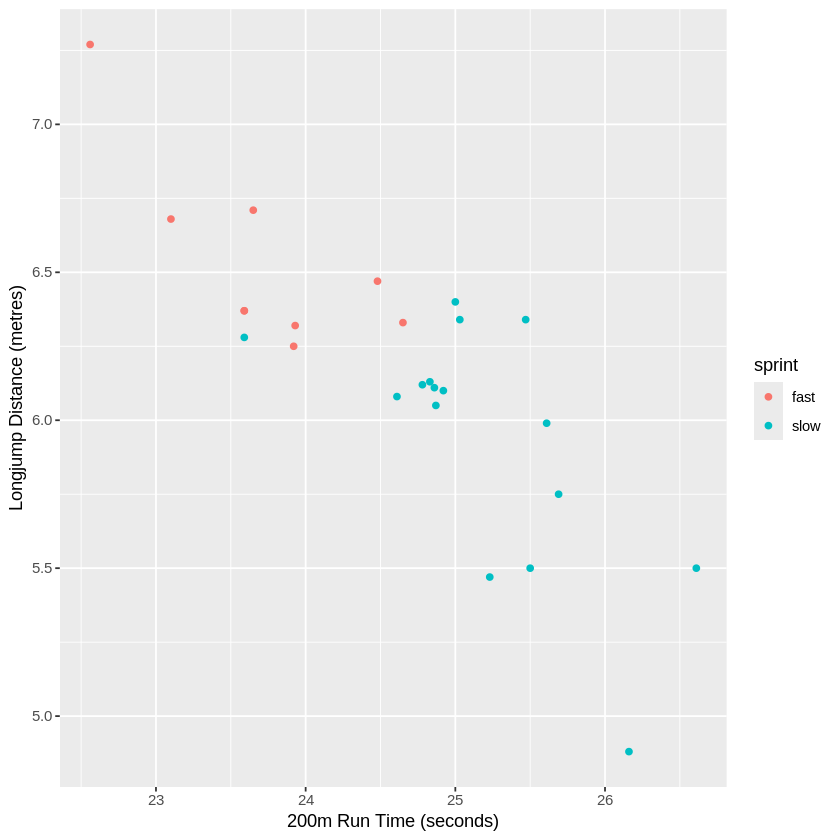

In [18]:
# Making a scatter plot between *run200m* (x-axis) and *longjump* (y-axis) now with the data points color-coded using *sprint*. What do you observe from this plot?
p2 = ggplot(data = heptathlon) +
  geom_point(aes(x = run200m, y = longjump, color = sprint)) +
  labs(x = '200m Run Time (seconds)', y = 'Longjump Distance (metres)')+
  My_Theme
p2

Here, we can see that one who can jump faster can also jump longer.

The two features are inversly proportional to one another. They are linearlly correlated in a linear sense.

In [19]:
round(cor(heptathlon %>% select(-c(score, sprint))), 2)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m
hurdles,1.00,-0.81,-0.65,0.77,-0.91,-0.01,0.78
highjump,-0.81,1.00,0.44,-0.49,0.78,0.00,-0.59
shot,-0.65,0.44,1.00,-0.68,0.74,0.27,-0.42
run200m,0.77,-0.49,-0.68,1.00,-0.82,-0.33,0.62
longjump,-0.91,0.78,0.74,-0.82,1.00,0.07,-0.70
javelin,-0.01,0.00,0.27,-0.33,0.07,1.00,0.02
run800m,0.78,-0.59,-0.42,0.62,-0.70,0.02,1.00


In [20]:
cormet = round(cor(heptathlon %>% select(-c(score, sprint))), 2)

## Pair-Wise correlation (Pearson's correlation) between the continuous covariates / predictors.

- calculating correlation involves `mean-centering` which is not possible for categorical features so sprint is excluded.

How do you calculate the pearson's corelation coefficients?

In [22]:
hurdles_scaled = (heptathlon$hurdles - mean(heptathlon$hurdles)) / sd(heptathlon$hurdles)
hurdles_scaled

[1] -1.56112593 -1.34392580 -0.86880052 -0.31222519 -0.44797527 -0.12217507
 [7] -0.62445037 -0.39367523 -0.28507517 -0.80092548 -0.12217507 -0.81450048
[13]  0.01357501 -0.17647510 -0.06787504  0.12217507 -0.50227530  0.31222519
[19]  0.74662544  0.27150016  0.63802538  0.52942531  1.37107581  0.93667556
[25]  3.50235208

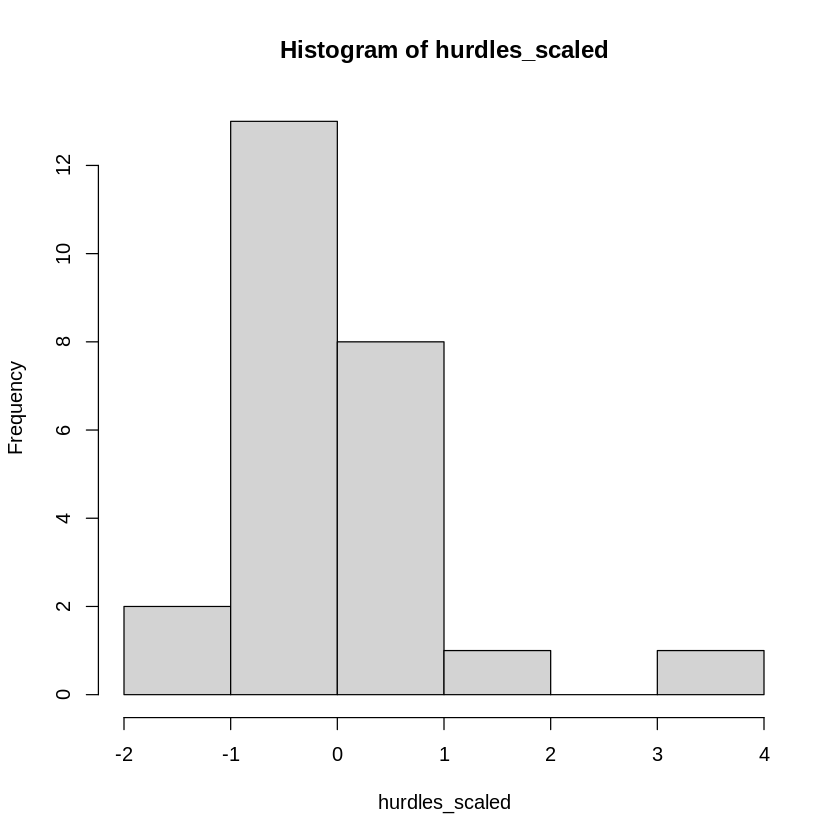

In [23]:
hist(hurdles_scaled)

In [29]:
run200m_scaled = (heptathlon$run200m - mean(heptathlon$run200m)) / sd(heptathlon$run200m)
run200m_scaled

[1] -2.154798275 -1.030573634 -1.597842949 -0.752095971 -0.741781983
 [6]  0.000825119 -1.092457559 -0.174512669  0.217418857 -1.092457559
[11]  0.392756645 -1.092457559  0.227732845  0.134906957 -0.040430831
[16]  0.361814683  0.846572097  0.186476895  0.279302782  0.990967922
[21]  1.073479822  0.877514059  0.599036396  2.022366675  1.558237236

In [30]:
sum(run200m_scaled * hurdles_scaled) / 24 # 24 because n -1

[1] 0.7737205

We need to scale the features.

There is no meaning of mean for categorical variable so we cannot use them in calculating Pearson's correlation coefficient, in this case `sprint`.

# Building a model

In [31]:
# Fit a linear model for approximating *score* as a function of *sprint*. Print the model's summary. How accurate is the model? How do the slow athletes' scores compare to the fast ones?
model1 = lm(data = heptathlon, score ~ sprint)
summary(model1)


Call:
lm(formula = score ~ sprint, data = heptathlon)

Residuals:
     Min       1Q   Median       3Q      Max 
-1240.81  -244.11   -55.11   301.89   695.89 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6595.1      142.0   46.43  < 2e-16 ***
sprintslow    -788.3      177.6   -4.44 0.000188 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 426.1 on 23 degrees of freedom
Multiple R-squared:  0.4615,	Adjusted R-squared:  0.4381 
F-statistic: 19.71 on 1 and 23 DF,  p-value: 0.0001881


**How accuaret is this model?**

This model has an Adjusted R-squared of 43%. We are able to explain 43% of the variance in the data.

`Predicted_score = B0hat + B1hat * sprintslow`

`Score_fast = 6595.1 - 788.3 * 0`

**How do we interpret the values of B0hat and B1hat?**

B0hat = 6595.1 =  avaerage response value (score) for the reference (slow) atheletes

b1hat = -788.3 =  differenec in the average values (score) between the first non-reference level(slow atheletes) and the reference level(fast athletes)

`Score_slow = Score_fast - 788.3`

In [32]:
heptathlon %>% filter(sprint == 'fast')

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score,sprint
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291,fast
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897,fast
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858,fast
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540,fast
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540,fast
Schulz (GDR),13.75,1.83,13.50,24.65,6.33,42.82,125.79,6411,fast
Fleming (AUS),13.38,1.80,12.88,23.59,6.37,40.28,132.54,6351,fast
Greiner (USA),13.55,1.80,14.13,24.48,6.47,38.00,133.65,6297,fast
Dimitrova (BUL),13.24,1.80,12.88,23.59,6.37,40.28,132.54,6171,fast


In [35]:
a = heptathlon %>% filter(sprint == 'fast') %>% select(score)
a

,score
,<int>
Joyner-Kersee (USA),7291
John (GDR),6897
Behmer (GDR),6858
Sablovskaite (URS),6540
Choubenkova (URS),6540
Schulz (GDR),6411
Fleming (AUS),6351
Greiner (USA),6297
Dimitrova (BUL),6171


In [34]:
model2 = lm(data = heptathlon, score ~ shot + sprint)
summary(model2)


Call:
lm(formula = score ~ shot + sprint, data = heptathlon)

Residuals:
     Min       1Q   Median       3Q      Max 
-1094.87  -140.19    51.08   120.99   523.54 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3181.2      885.6   3.592 0.001621 ** 
shot           237.1       61.0   3.886 0.000796 ***
sprintslow    -312.9      185.8  -1.684 0.106261    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 335.5 on 22 degrees of freedom
Multiple R-squared:  0.6807,	Adjusted R-squared:  0.6517 
F-statistic: 23.45 on 2 and 22 DF,  p-value: 3.518e-06


`pred_score = B0hat + B1hat * shot + B2hat * sprintslow`



**Is there a linear relationship between score and shot?**

This is dertermined using the predictor's p-value.

### Population model:

`score = B0 + B1 * Shot + B2 * sprintslow + E`

**`H0`: There is no linear relation between the response (score) and predictor (shot) in population model.**

It asks: Can B1 be 0 but just by chance showed up as 237.1 in our dataset?

----

**`H1`: There is a linear relationship between the response and the predictor.**

B1 != 0


------------
------------

- B1 is a fixed population parameter.

- B1hat us an estimate from a specific dataset.

estimator B1hat:
- estimate from dataset 1
- estimate from dataset 2
  .
  .
  .
- estinate from dataset n


T-statistics that comes from the dataset

`= (B1hat - E[B1hat]) / SE[B1hat]`

------------
------------

Assuming H0 is True:

T = (B1hat - 0) / SE [B1hat]

In [38]:
 t_value = 237.1 / 61
 t_value

[1] 3.886885

**Can B1 be 0 but just by chance showed up as 237.1 in our dataset?**

We calcualte a p-value (probability)

`p(T > 3.888 | H0 si True)`

`approx = 0.000796`

It is a very small probabilty and tehrefore we reject the null-hypothesis and accept the H1. That, there is a linear relationship between `score` and `shot`.

*A typical cutoff for p-value (False-Positive value (or) just by chance probability we are willing to accept) is 5% or 10%.*